## Solve the equation of a line from data

In [1]:
%matplotlib inline
import numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3,3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x + b

In [3]:
a=3
b=8

In [4]:
n = 30
x = random(n)

In [5]:
x[:5]

array([ 0.422 ,  0.3686,  0.188 ,  0.2123,  0.4054])

In [6]:
y = lin(a,b,x)
y[:5]

array([ 9.2659,  9.1059,  8.5641,  8.6369,  9.2161])

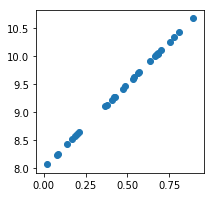

In [7]:
plt.scatter(x,y)

Forget that we know what a and b are, and calculate them from the data.

In [8]:
# define sum of square errors as the loss function

def sse(y, y_pred): return ((y - y_pred)**2).sum()

def loss(y, a, b, x): return sse(y, lin(a,b,x))

def avg_loss(y, a, b, x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess = 1
b_guess = -1
avg_loss(y, a_guess, b_guess, x)

9.9578

### Gradient Descent
To take steps from a random guess toward the right answer, we need to figure out the direction of the right answer.  We do this by taking calculating the slope of the loss function and taking a small step down the slope.

Our sum of square errors loss function is:

    y_pred = ax + b
    loss = (y - y_pred)**2
         = (y - (ax + b))**2
         = (y - ax - b)**2
        
    dydb = -2(y - ax - b)
         = 2(ax + b - y)
         = 2(y_pred - y)
         
    dyda = -2x(y - ax - b)
         = x * dydb

In [10]:
lr = 0.1   # the size of our step

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x * dydb
    
    a_guess -= lr * dyda.mean()
    b_guess -= lr * dydb.mean()

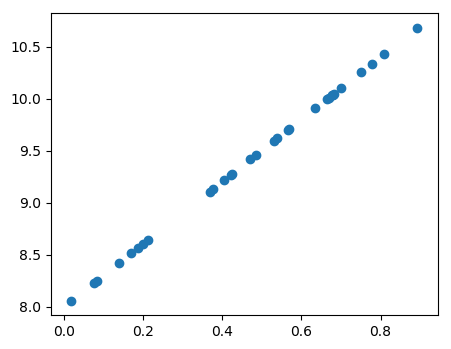

In [12]:
fig = plt.figure(dpi=100, figsize=(5,4))
plt.scatter(x,y)

In [13]:
line, = plt.plot(x,lin(a_guess, b_guess, x))
plt.close()

In [14]:
def animate(i):
    line.set_ydata(lin(a_guess, b_guess, x))
    for i in range(10): upd()
    return line,

In [15]:
ani = animation.FuncAnimation(fig, animate, np.arange(0,40), interval=100)

In [16]:
ani